#Part 2: Kaggle Social Media and Mental Health Dataset: Suitable for clustering analysis to differentiate user profiles based on mental health indicators.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
#CSV data file 
SM2_data = pd.read_csv(r'C:\Users\omnia\Google Drive\Springboard\Capstone 2\Dataset2.csv')
SM2_data.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [3]:
SM2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

In [4]:
# Missing data
missing = pd.concat([SM2_data.isnull().sum(), 100 * SM2_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
5. What type of organizations are you affiliated with?,30,6.237006
Timestamp,0,0.000000
11. Do you feel restless if you haven't used Social media in a while?,0,0.000000
"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?",0,0.000000
18. How often do you feel depressed or down?,0,0.000000
17. How often do you look to seek validation from features of social media?,0,0.000000
"16. Following the previous question, how do you feel about these comparisons, generally speaking?",0,0.000000
"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?",0,0.000000
14. Do you find it difficult to concentrate on things?,0,0.000000
"13. On a scale of 1 to 5, how much are you bothered by worries?",0,0.000000


In [5]:
print(SM2_data.columns)

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

In [6]:
columns_to_drop = ['5. What type of organizations are you affiliated with?', 'Timestamp', '4. Occupation Status', '6. Do you use social media?', '7. What social media platforms do you commonly use?']  
SM2_data = SM2_data.drop(columns=columns_to_drop)
SM2_data.head().T

,0,1,2,3,4
1. What is your age?,21.0,21.0,21.0,21.0,21.0
2. Gender,Male,Female,Female,Female,Female
3. Relationship Status,In a relationship,Single,Single,Single,Single
8. What is the average time you spend on social media every day?,Between 2 and 3 hours,More than 5 hours,Between 3 and 4 hours,More than 5 hours,Between 2 and 3 hours
9. How often do you find yourself using Social media without a specific purpose?,5,4,3,4,3
10. How often do you get distracted by Social media when you are busy doing something?,3,3,2,2,5
11. Do you feel restless if you haven't used Social media in a while?,2,2,1,1,4
"12. On a scale of 1 to 5, how easily distracted are you?",5,4,2,3,4
"13. On a scale of 1 to 5, how much are you bothered by worries?",2,5,5,5,5
14. Do you find it difficult to concentrate on things?,5,4,4,3,5


In [7]:
SM2_data.dtypes

1. What is your age?                                                                                                    float64
2. Gender                                                                                                                object
3. Relationship Status                                                                                                   object
8. What is the average time you spend on social media every day?                                                         object
9. How often do you find yourself using Social media without a specific purpose?                                          int64
10. How often do you get distracted by Social media when you are busy doing something?                                    int64
11. Do you feel restless if you haven't used Social media in a while?                                                     int64
12. On a scale of 1 to 5, how easily distracted are you?                                                

In [8]:
# Convert all float columns to integers
#float_cols = SM2_data.select_dtypes(include=['float']).columns
#SM2_data[float_cols] = SM2_data[float_cols].astype(int)
#SM2_data.head().T

In [9]:
print("Unique Relationship Status:")
print(SM2_data['3. Relationship Status'].unique())

Unique Relationship Status:
['In a relationship' 'Single' 'Married' 'Divorced']


In [10]:
print("Unique Gender:")
print(SM2_data['2. Gender'].unique())

Unique Gender:
['Male' 'Female' 'Nonbinary ' 'Non-binary' 'NB' 'unsure ' 'Trans'
 'Non binary ' 'There are others???']


In [11]:
# Define the mapping for Gender values
gender_mapping = {
    'Male': 'Male',
    'Female': 'Female',
    'Nonbinary ': 'Non-binary',
    'Non-binary': 'Non-binary',
    'NB': 'Non-binary',
    'Non binary ': 'Non-binary',
    'Trans': 'Other',
    'unsure ': 'Other',
    'There are others???': 'Other'
}

In [12]:
# Apply the mapping to the Gender column
SM2_data['2. Gender'] = SM2_data['2. Gender'].replace(gender_mapping)
print("Unique Gender After Mapping:")
print(SM2_data['2. Gender'].unique())

Unique Gender After Mapping:
['Male' 'Female' 'Non-binary' 'Other']


In [13]:
# Rename columns for easier reference
column_rename_mapping = {
    '1. What is your age?': 'Age',
    '2. Gender': 'Gender',
    '3. Relationship Status': 'Relationship_Status',
    '8. What is the average time you spend on social media every day?': 'Average_Daily_SM_Time',
    '9. How often do you find yourself using Social media without a specific purpose?': 'Use_Without_Purpose',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'Distraction_Level',
    '11. Do you feel restless if you haven\'t used Social media in a while?': 'Restlessness',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'Distractibility_Scale',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'Worry_Scale',
    '14. Do you find it difficult to concentrate on things?': 'Concentration_Difficulty',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'Comparison_Scale',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'Comparison_Feelings',
    '17. How often do you look to seek validation from features of social media?': 'Validation_Seeking',
    '18. How often do you feel depressed or down?': 'Depression_Frequency',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'Interest_Fluctuation',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'Sleep_Issues'
}

In [14]:
# Apply the renaming
SM2_data = SM2_data.rename(columns=column_rename_mapping)
print(SM2_data.columns)

Index(['Age', 'Gender', 'Relationship_Status', 'Average_Daily_SM_Time',
       'Use_Without_Purpose', 'Distraction_Level', 'Restlessness',
       'Distractibility_Scale', 'Worry_Scale', 'Concentration_Difficulty',
       'Comparison_Scale', 'Comparison_Feelings', 'Validation_Seeking',
       'Depression_Frequency', 'Interest_Fluctuation', 'Sleep_Issues'],
      dtype='object')


In [15]:
SM2_data.head().T

,0,1,2,3,4
Age,21.0,21.0,21.0,21.0,21.0
Gender,Male,Female,Female,Female,Female
Relationship_Status,In a relationship,Single,Single,Single,Single
Average_Daily_SM_Time,Between 2 and 3 hours,More than 5 hours,Between 3 and 4 hours,More than 5 hours,Between 2 and 3 hours
Use_Without_Purpose,5,4,3,4,3
Distraction_Level,3,3,2,2,5
Restlessness,2,2,1,1,4
Distractibility_Scale,5,4,2,3,4
Worry_Scale,2,5,5,5,5
Concentration_Difficulty,5,4,4,3,5


In [16]:
SM2_data['Average_Daily_SM_Time'].unique()

array(['Between 2 and 3 hours', 'More than 5 hours',
       'Between 3 and 4 hours', 'Less than an Hour',
       'Between 1 and 2 hours', 'Between 4 and 5 hours'], dtype=object)

In [17]:
# Define the mapping from time ranges to numerical values (in hours)
time_mapping = {
    'Less than an Hour': 0.5,
    'Between 1 and 2 hours': 1.5,
    'Between 2 and 3 hours': 2.5,
    'Between 3 and 4 hours': 3.5,
    'Between 4 and 5 hours': 4.5,
    'More than 5 hours': 5.5  
}

In [18]:
SM2_data['Average_Daily_SM_Time'] = SM2_data['Average_Daily_SM_Time'].replace(time_mapping)
print(SM2_data['Average_Daily_SM_Time'].head())

0    2.5
1    5.5
2    3.5
3    5.5
4    2.5
Name: Average_Daily_SM_Time, dtype: float64


In [19]:
# Convert object to numeric
categorical_columns = ['Gender', 'Relationship_Status'] 
for column in categorical_columns:
    label_encoder = LabelEncoder()
    SM2_data[column] = label_encoder.fit_transform(SM2_data[column])
SM2_data.dtypes

Age                         float64
Gender                        int32
Relationship_Status           int32
Average_Daily_SM_Time       float64
Use_Without_Purpose           int64
Distraction_Level             int64
Restlessness                  int64
Distractibility_Scale         int64
Worry_Scale                   int64
Concentration_Difficulty      int64
Comparison_Scale              int64
Comparison_Feelings           int64
Validation_Seeking            int64
Depression_Frequency          int64
Interest_Fluctuation          int64
Sleep_Issues                  int64
dtype: object

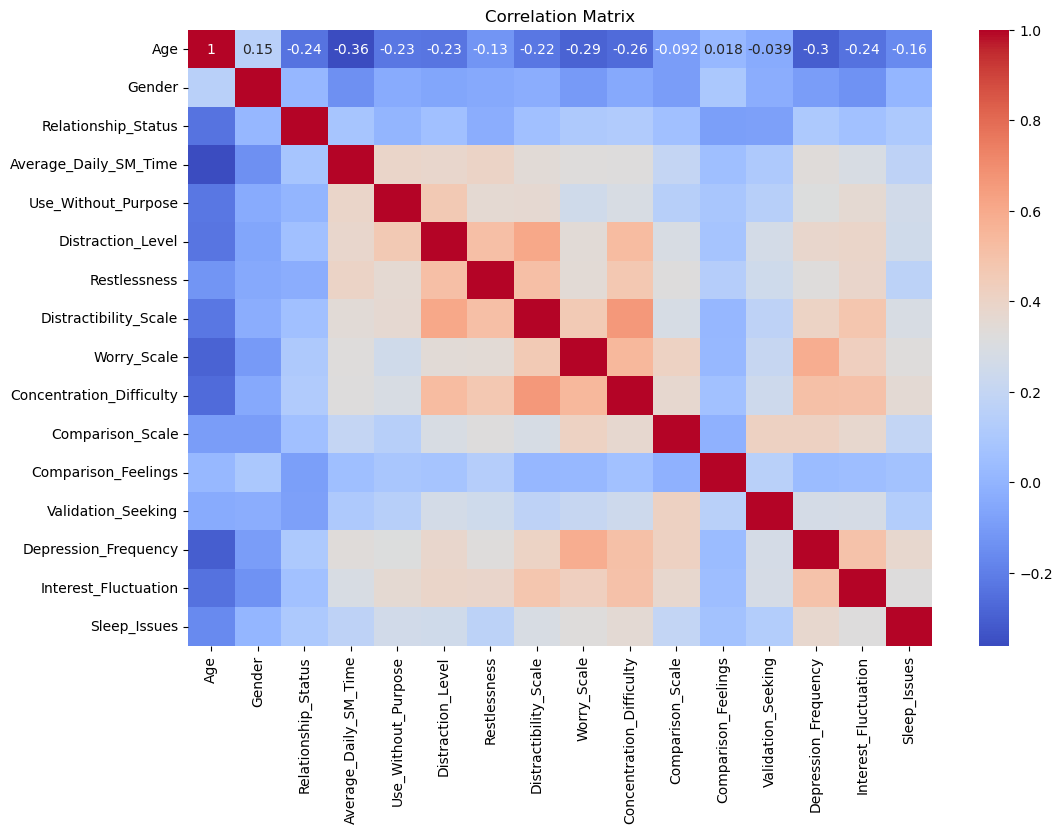

In [20]:
# Check correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(SM2_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
#clustering
clustering_features = SM2_data[['Age', 'Gender', 'Average_Daily_SM_Time', 'Worry_Scale', 'Depression_Frequency', 'Restlessness', 'Concentration_Difficulty', 'Sleep_Issues']]

In [22]:
# Standardize the features
scaler = StandardScaler()
clustering_data = scaler.fit_transform(clustering_features)

In [23]:
# Determine the number of clusters 
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clustering_data)

C:\Users\omnia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\omnia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [24]:
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)
age_centers_original = original_centers[:, 0]  
print("Cluster Centers (Age) in Original Scale:", age_centers_original)

Cluster Centers (Age) in Original Scale: [43.4125     23.00726496 22.24550898]


In [25]:
SM2_data['Cluster'] = kmeans.labels_

In [26]:
print(SM2_data['Age'].describe())

count    481.00000
mean      26.13659
std        9.91511
min       13.00000
25%       21.00000
50%       22.00000
75%       26.00000
max       91.00000
Name: Age, dtype: float64


In [27]:
# Define the age ranges for the clusters
def assign_age_group(age):
    if age <= 25:
        return 'Young Age'
    elif 26 <= age <= 55:
        return 'Middle Age'
    else:
        return 'Older Age'

In [28]:
SM2_data['Cluster_Label'] = SM2_data['Age'].apply(assign_age_group)


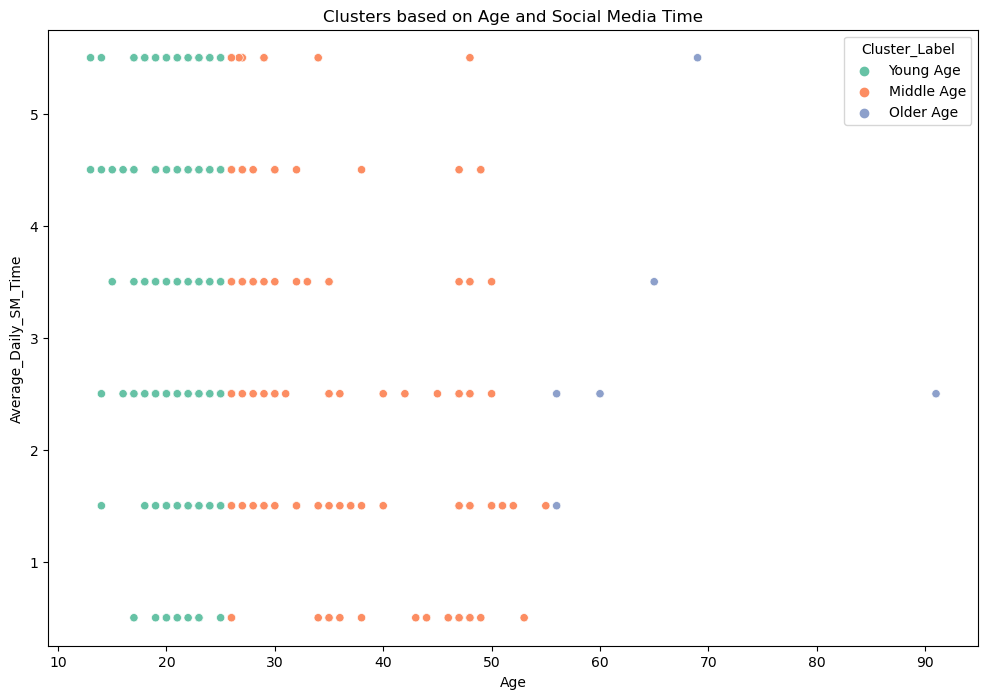

In [29]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Average_Daily_SM_Time', hue='Cluster_Label', data=SM2_data, palette='Set2')
plt.title('Clusters based on Age and Social Media Time')
plt.show()

In [30]:
# Analyze cluster characteristics
numeric_columns = SM2_data.select_dtypes(include=[np.number]).columns
cluster_summary = SM2_data.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)

               Age    Gender  Relationship_Status  Average_Daily_SM_Time  \
Cluster                                                                    
0        43.412500  0.612500             1.987500               1.662500   
1        23.007265  0.393162             2.448718               4.106838   
2        22.245509  0.520958             2.473054               3.266467   

         Use_Without_Purpose  Distraction_Level  Restlessness  \
Cluster                                                         
0                   2.800000           2.187500      1.787500   
1                   3.940171           3.901709      3.183761   
2                   3.371257           3.047904      2.137725   

         Distractibility_Scale  Worry_Scale  Concentration_Difficulty  \
Cluster                                                                 
0                     2.387500     2.237500                  1.925000   
1                     3.965812     4.435897                  4.123932   
2

In [31]:
print(SM2_data['Average_Daily_SM_Time'].describe())

count    481.000000
mean       3.408524
std        1.590319
min        0.500000
25%        2.500000
50%        3.500000
75%        4.500000
max        5.500000
Name: Average_Daily_SM_Time, dtype: float64


C:\Users\omnia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


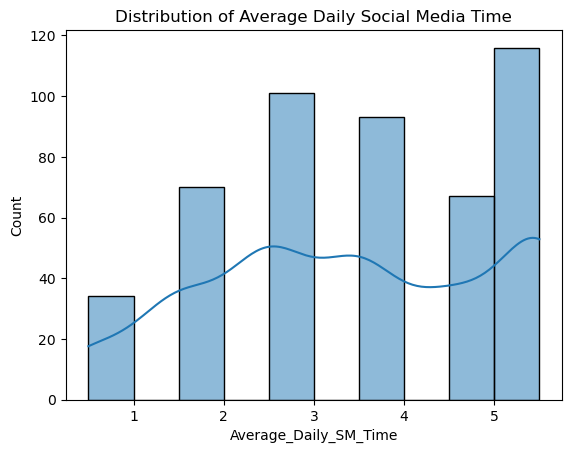

In [32]:
sns.histplot(SM2_data['Average_Daily_SM_Time'], kde=True)
plt.title('Distribution of Average Daily Social Media Time')
plt.show()

In [33]:
SM2_data.dtypes

Age                         float64
Gender                        int32
Relationship_Status           int32
Average_Daily_SM_Time       float64
Use_Without_Purpose           int64
Distraction_Level             int64
Restlessness                  int64
Distractibility_Scale         int64
Worry_Scale                   int64
Concentration_Difficulty      int64
Comparison_Scale              int64
Comparison_Feelings           int64
Validation_Seeking            int64
Depression_Frequency          int64
Interest_Fluctuation          int64
Sleep_Issues                  int64
Cluster                       int32
Cluster_Label                object
dtype: object

count    481.00000
mean      26.13659
std        9.91511
min       13.00000
25%       21.00000
50%       22.00000
75%       26.00000
max       91.00000
Name: Age, dtype: float64


C:\Users\omnia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


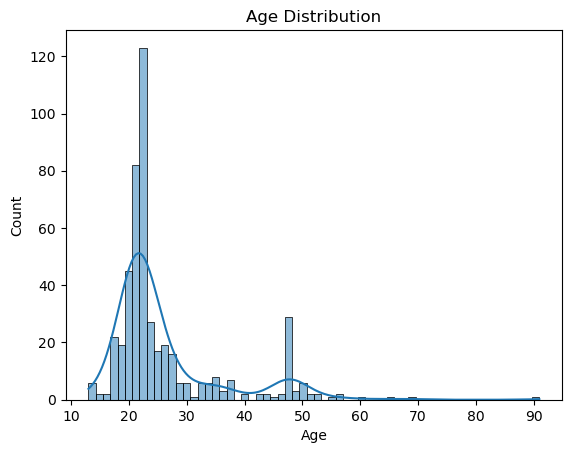

In [34]:
print(SM2_data['Age'].describe())
sns.histplot(SM2_data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()